In [31]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from two_layer_net import TwoLayerNet


print('hello world')

hello world


In [2]:
df_origin = pd.read_csv('open/train.csv')

train_df = pd.read_csv('open/train.csv')
test_df = pd.read_csv('open/test.csv')
sub_df = pd.read_csv('open/sample_submission.csv')

print('Number of Data for training : {col}\n Number of Variables : {row}'
      .format(col = train_df.shape[0], row = train_df.shape[1]))

Number of Data for training : 1095
 Number of Variables : 13


In [3]:
train_df.loc[[611,612,613,614,615]]

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
611,2019-09-04,22.7,22.8,25.5,21.2,6.0,3.0,89.0,1.1,8.5,2.5,4.5,27168
612,2019-09-05,36.4,23.0,27.6,21.5,9.0,6.0,91.4,1.5,11.6,2.0,5.0,33929
613,2019-09-06,2.4,25.3,29.1,21.6,13.0,8.0,79.8,0.4,3.1,2.1,3.4,16631
614,2019-09-08,0.0,24.7,27.3,22.9,NaN,NaN,76.9,1.4,11.0,1.9,4.8,52055
615,2019-09-09,0.0,25.1,28.0,22.4,35.0,26.0,74.3,2.0,15.7,1.7,3.6,68370


In [4]:
# 2018.01.01 ~ 2020.12.31 (NaN of 2019.09.07 sat ;;;;;)
# 
new_row = pd.DataFrame(train_df.loc[[613]], columns = train_df.columns)

new_df = pd.concat([train_df.iloc[:613], new_row, train_df.iloc[613:]], ignore_index = True)

new_df.loc[614,'date'] = '2019-09-07' 


print(new_df.loc[[612,613,614,615]])
len(new_df)

           date  precipitation  temp_mean  temp_highest  temp_lowest  PM10  \
612  2019-09-05           36.4       23.0          27.6         21.5   9.0   
613  2019-09-06            2.4       25.3          29.1         21.6  13.0   
614  2019-09-07            2.4       25.3          29.1         21.6  13.0   
615  2019-09-08            0.0       24.7          27.3         22.9   NaN   

     PM2.5  humidity  sunshine_sum  sunshine_rate  wind_mean  wind_max  rental  
612    6.0      91.4           1.5           11.6        2.0       5.0   33929  
613    8.0      79.8           0.4            3.1        2.1       3.4   16631  
614    8.0      79.8           0.4            3.1        2.1       3.4   16631  
615    NaN      76.9           1.4           11.0        1.9       4.8   52055  


1096

In [5]:
# To distinguish weekend and weekday
# The name of new index is "days of week" 
# [0:Mon , 1:Tue, 2:Wen, 3:Thur, 4:Fri, 5:Sat, 6:Sun]

df_week = [] # List for df column "days of week"

L1 = new_df.shape[0] // 7  # 1096 // 7
L2 = new_df.shape[0] % 7  # 1096 // 7

#week = [0, 1, 2, 3, 4, 5, 6]
week = [0, 0, 0, 0, 0, 1, 1] # weekday / weekend

for i in range(0,L1,1):
    df_week.extend(week)

for i in range(0,L2,1):
    df_week.append(0)

print(df_week)
print(len(df_week))

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [6]:
year = []
month = []
day = [] 

for date in new_df["date"] :
    y = date.split('-')[0]
    m = date.split('-')[1]
    d = date.split('-')[2]
    
    year.append(y)
    month.append(m)
    day.append(d)

new_df["year"] = year 
new_df["month"] = month 
new_df["day"] = day

In [7]:
new_df

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,01,01
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,01,02
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,01,03
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,01,04
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27
1092,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28
1093,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29
1094,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30


In [8]:
# Appended New Col "days of week"
new_df['days_of_week'] = df_week
new_df

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,year,month,day,days_of_week
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950,2018,01,01,0
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136,2018,01,02,0
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156,2018,01,03,0
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102,2018,01,04,0
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705,2018,01,05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103,2020,12,27,1
1092,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912,2020,12,28,0
1093,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747,2020,12,29,0
1094,2020-12-30,NaN,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488,2020,12,30,0


In [9]:
SS_list_Nan= new_df['sunshine_sum'][new_df['sunshine_sum'].isnull()].index
print(SS_list_Nan)

Int64Index([17, 25, 45, 187, 604], dtype='int64')


In [10]:
new_df['sunshine_rate'].loc[SS_list_Nan].values.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

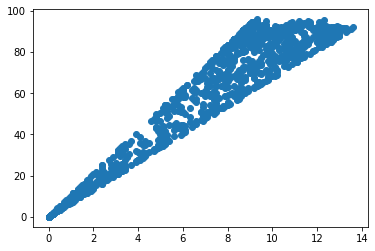

In [11]:
new_df[['sunshine_rate', 'sunshine_sum']].corr(method='pearson') # Pearson Correlation

a = new_df['sunshine_sum'].dropna()
b = new_df['sunshine_rate'].drop(SS_list_Nan)
a.isnull().sum()
b.isnull().sum()

plt.plot(a,b, 'o')

In [12]:
SS_list_Nan

Int64Index([17, 25, 45, 187, 604], dtype='int64')

In [13]:
a = a.values.reshape(-1,1) # a is sum
b = b.values.reshape(-1,1) # b is rate

In [14]:
print(a)
print(b)
new_df['sunshine_rate'].loc[SS_list_Nan] 

[[8.3]
 [7.9]
 [8.6]
 ...
 [0. ]
 [8.3]
 [6. ]]
[[86.5]
 [82.3]
 [88.7]
 ...
 [ 0. ]
 [86.5]
 [62.5]]


17     0.0
25     0.0
45     0.0
187    0.0
604    0.0
Name: sunshine_rate, dtype: float64

In [15]:
line_fitter = LinearRegression()

line_fitter.fit(b, a) # predict a(sum) through b(rate) 
SS_sol_Nan = line_fitter.predict(new_df['sunshine_rate'].loc[SS_list_Nan].values.reshape(-1,1))
SS_sol_Nan = list(SS_sol_Nan)
float(SS_sol_Nan[1])

0.18831290943413048

In [16]:
new_df["PM10"] = new_df["PM10"].fillna(new_df["PM10"].mean())
new_df["PM2.5"] = new_df["PM2.5"].fillna(new_df["PM2.5"].mean())
new_df["sunshine_sum"] = new_df["sunshine_sum"].fillna(0)


print(new_df['sunshine_sum'].loc[SS_list_Nan])
print(float(SS_sol_Nan[1]))

for i, j in zip(SS_list_Nan, range(0,5,1)):
    new_df['sunshine_sum'].loc[i] = float(SS_sol_Nan[j])

17     0.0
25     0.0
45     0.0
187    0.0
604    0.0
Name: sunshine_sum, dtype: float64
0.18831290943413048


C:\Users\Admin\AppData\Local\Temp\ipykernel_17872\1219593550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sunshine_sum'].loc[i] = float(SS_sol_Nan[j])


In [17]:
print(new_df['sunshine_sum'].loc[SS_list_Nan])

17     0.188313
25     0.188313
45     0.188313
187    0.188313
604    0.188313
Name: sunshine_sum, dtype: float64


In [18]:
PP_list_Nan= new_df['precipitation'][new_df['precipitation'].isnull()].index
print(PP_list_Nan)

pp = new_df['precipitation'].dropna()
srss = new_df[['sunshine_rate','sunshine_sum']].drop(PP_list_Nan)

Int64Index([   0,    1,    2,    3,    4,    5,    6,   10,   13,   16,
            ...
            1079, 1080, 1083, 1084, 1085, 1086, 1088, 1089, 1090, 1094],
           dtype='int64', length=678)


In [19]:
#pp = pp.values.reshape(-1,1) # pp is precipitation
#srss = srss.values.reshape(-1,1) # sr is sun_ratio

In [20]:
line_fitter.fit(srss, pp)

LinearRegression()

In [21]:
pp_sol_Nan = line_fitter.predict(new_df[['sunshine_rate','sunshine_sum']].loc[PP_list_Nan].values)
pp_sol_Nan = list(pp_sol_Nan)
pp_sol_Nan

c:\Users\Admin\anaconda3\envs\lftest\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[-1.8792040090657771,
 -1.0069844396847003,
 -2.4017551641558548,
 2.776146032363977,
 -1.529535594774778,
 -2.824010893904738,
 9.445796337946554,
 -2.4881965345553922,
 4.153745661143871,
 5.925892909789335,
 -2.3635100400804916,
 4.939523860125405,
 -1.183184221233386,
 -2.9586485106284535,
 -2.5363927808795736,
 -1.283479646574584,
 15.992609412851913,
 -2.6228341512791147,
 0.2913937921380967,
 -2.42556034134633,
 -2.709275521678652,
 -1.97891354246374,
 -2.5984430821454083,
 -2.896012317419391,
 -2.276482777737723,
 -2.684884452544946,
 -2.574052013011702,
 11.650736330532949,
 5.355145508375076,
 -0.5492147346668332,
 9.494578476213963,
 15.992609412851913,
 -3.2417777990175516,
 -1.8470070745463971,
 1.745483669068708,
 6.60474160193046,
 -0.3552579654836556,
 -3.3282191694170926,
 1.2057614182873682,
 -1.922911430753885,
 -3.8956495300817444,
 16.129300698470786,
 -3.871258460948038,
 -4.227560956738248,
 6.3869796555568055,
 1.0434156916803374,
 -2.4969758729177514,
 1.874073

In [22]:
new_df.isnull().sum()

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       0
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
year               0
month              0
day                0
days_of_week       0
dtype: int64

In [23]:
print(test_df.isnull().sum())

date               0
precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64


In [74]:
x = new_df.drop(['precipitation','date','rental'], axis=1)
y = new_df['rental']

train_x, val_x, train_y, val_y = train_test_split(x, y, test_size = 0.25, shuffle=True)

test_x = test_df.drop(['date'], axis = 1)

In [75]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [73]:
reg = GradientBoostingRegressor()

reg.fit(train_x, train_y)
val_pred = reg.predict(val_x)

NMAE(val_y, val_pred)


0.15945126399794843

In [27]:
train_x

,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,year,month,day,days_of_week
94,7.6,9.5,6.7,36.029155,21.519455,90.6,0.0,0.0,2.0,3.5,2018,04,05,0
359,-1.5,3.0,-7.1,49.000000,26.000000,40.8,8.3,86.5,2.8,4.5,2018,12,26,0
197,28.1,32.1,23.9,28.000000,25.000000,66.5,13.0,89.7,1.7,4.1,2018,07,17,0
350,1.6,5.9,-1.5,72.000000,45.000000,60.1,8.3,86.5,1.8,4.3,2018,12,17,0
266,17.6,22.1,14.2,13.000000,6.000000,48.3,11.0,90.9,2.1,4.4,2018,09,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,19.4,21.6,17.9,14.000000,7.000000,93.0,0.0,0.0,1.2,2.7,2019,05,19,1
321,6.1,10.7,1.9,36.029155,21.000000,48.8,2.4,23.8,1.1,3.1,2018,11,18,1
821,11.3,17.4,6.0,64.000000,30.000000,35.6,8.6,68.3,3.7,7.3,2020,04,01,0
405,-5.0,-1.9,-9.1,39.000000,20.000000,31.3,2.2,20.8,1.7,3.6,2019,02,10,1


In [28]:
train_y

94      2833
359    17112
197    43323
350    17449
266    36406
       ...  
503    12749
321    26464
821    70258
405     9759
451    38806
Name: rental, Length: 822, dtype: int64

In [29]:
network = TwoLayerNet(input_size=14, hidden_size=5, output_size=2) #  Activation function : ReLU

iters_num = 10000
train_size = train_x.shape[0]
batch_size = 100
learning_rate = 0.15

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # max(8, 1)


In [30]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = train_x[batch_mask]
    t_batch = train_y[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(train_x, train_y)
        test_acc = network.accuracy(train_x, train_y)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

KeyError: "None of [Int64Index([360, 795, 225, 193, 162, 164, 266, 124, 475, 662, 271,  85,  81,\n            638, 639, 296,  78, 289,  35, 632, 396, 382, 387, 776, 815, 469,\n            717, 216, 368, 540, 415, 336, 695, 284, 800, 363, 765, 344, 506,\n            761,  49, 507, 683,  92, 544, 614,  87, 299, 669, 536, 540, 615,\n            336,  94, 657, 720, 532, 382, 128, 275, 480, 267, 424, 235, 473,\n            706, 457, 733, 795, 452, 604,  68, 132, 547, 570,  71, 241, 112,\n            152, 434, 349, 483, 782, 437, 620, 689, 294, 332, 665, 153, 163,\n            618, 793, 780, 559, 484, 792,  88, 389, 240],\n           dtype='int64')] are in the [columns]"